In [ ]:
#import robust scaler
from sklearn.preprocessing import RobustScaler
#import one hot encoder
from sklearn.preprocessing import OneHotEncoder

class PreProcessor1:
    def __init__(self):
        
        self.status = 'train'
        self.scaler = RobustScaler()
        self.version = '2.0 11 dec 2024 late frango'
        self.encoder = OneHotEncoder()
        
        self.date_cols = []
        self.desc_cols = []
        self.code_cols = []
        self.casting_methods = []
        self.casting_list = [
    ('Age at Injury',                       'Int64'),
    ('Average Weekly Wage',                 'float64'),
    # ('WCB Decision',                        'remove'),
    ('Alternative Dispute Resolution',      'string-U-nan'),
    ('District Name',                       'none'),
    ('Carrier Name',                        'string'),
    ('IME-4 Count',                         'Int64'),
    ('COVID-19 Indicator',                  'string'),
    ('Number of Dependents',                'Int64'),
    ('Carrier Type',                         '.str[:2]'),
    ('Medical Fee Region',                   'string'),
    ('County of Injury',                    'string'),
    ('Agreement Reached',                   'Int64'),
    ('Attorney/Representative',             'string'),
    ('Birth Year',                          'Int64'),
    ('Gender',                              'string'),
    ('Zip Code',                            '.str[0:5]'),
]
        self.casted_cols = []
        self.transformation_list = [
    ('Age at Injury',                   'none',             '-'),
    ('Average Weekly Wage',             'log',              'log_Average Weekly Wage'),
    # ('WCB Decision',                    'none',             '-'),
    ('Alternative Dispute Resolution',  'dummy-YN',         'Alternative Dispute Resolution'),
    ('District Name',                   'none',             '-'),
    ('Carrier Name',                    'none',             '-'),
    ('IME-4 Count',                     'none',             '-'),
    ('COVID-19 Indicator',              'dummy-YN',         'COVID-19 Indicator'),
    ('Number of Dependents',            'none',             '-'),
    ('Carrier Type',                    'oneHot',           '-OneHot'),
    ('Carrier Type',                    'freq_encode',      'fe_Carrier Type'),
    ('Medical Fee Region',              'oneHot',           '-oneHot'),
    ('Medical Fee Region',              'freq_encode',      'fe_Medical Fee Region'),
    ('County of Injury',                'oneHot',           '-oneHot'),
    ('County of Injury',                'freq_encode',      'fe_County of Injury'),
    ('Agreement Reached',               'none',             '-oneHot'),
    ('Attorney/Representative',         'dummy-YN',         'Attorney/Representative'),
    ('Birth Year',                      'subtract_1900',    'Age'),
    ('Gender',                          'oneHot',           '-oneHot'),
]     
        self.transformed_cols = []
        self.fillna_list = []


# ------------------------ internal functions
    def update_status(self, status):
        if status in ['train', 'valid', 'test']:
            self.status = status
        else:  
            print('Unknown status')
    
    def __str__(self):
        return (f"PreProcessor1: {self.status}" +
            f"scaler: {self.scaler}" +
                f"version: {self.version}")
        
        
       
        
# ------------------------casting part
        
        
    def update_casted_cols(self):     
        self.casted_cols = [col for col, method in self.casting_list]

    def update_casting_methods(self):
        self.casting_methods = [method for col, method in self.casting_list]

    def set_castings(self,df):
        df_cols = df.columns
        columns_to_be_casted = set(df_cols) - set(self.casted_cols)
    
        date_cols = []
        date_cols.extend([x for x in df_cols if 'Date' in x])
        for col in date_cols:
            self.append_casting(col, 'string')
        columns_to_be_casted = columns_to_be_casted - set(date_cols)
    
        desc_cols = []
        desc_cols.extend([x for x in df_cols if 'Description' in x])
        for col in desc_cols:
            self.append_casting(col, 'remove')
        columns_to_be_casted = columns_to_be_casted - set(desc_cols)
    
        code_cols = []
        code_cols.extend([x for x in df_cols if 'Code' in x])
        for col in code_cols:
            self.append_casting(col, 'Int64')
        columns_to_be_casted = columns_to_be_casted - set(code_cols)
    
        if len(columns_to_be_casted) > 0:
            print ('Columns that are not casted:')
            for col in columns_to_be_casted:
                try:
                    print (f'-{col}: {df[col].dtype}')
                except Exception as e: 
                    print(e)
                    print (f'-{col}: not found')

    def look_for_feature_casting(self,feature):
        i = 0
        for col, method in self.casting_list:
            if col == feature:
                print(f'-Column {col} is casted as {method} at index {i}')
                return method
            i += 1
        return None

    def update_casting_list(self,feature,method):
        i = 0
        for col, method in self.casting_list:
            if col == feature:
                self.casting_list[i] = (feature, method)
                return
            i += 1
        #print(f'-Column {feature} not found in casting list. Adding it now')
        self.append_casting(feature, method)
    
    def append_casting(self,feature,method):
        self.casting_list.append((feature, method))
    
        
    def cast_pipeline(self,df):
        for col, method in self.casting_list:
            if method == 'Int64':
                df = self.cast_Int64(df, col)
            elif method == 'float64':
                df = self.cast_Float64(df, col)
            elif method == 'string':
                df = self.cast_string(df, col)
            elif method == 'string-U-nan':
                df = self.cast_string_U_nan(df, col)
            elif method == '.str[:2]':
                df = self.cast_string_2(df, col)
            elif method == 'datetime64':
                df = self.cast_datetime64(df, col)
            elif method == 'remove':
                df = self.cast_remove(df, col)
            elif method == '.str[0:5]':
                df = self.cast_string_5(df, col)
                
            elif method == 'none':
                pass
            else:
                print(f'Unknown method {method} for column {col}')
        return df

    def cast_Int64(self, df, col):
        try:
            df[col] = df[col].astype('Int64')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df


    def cast_Float64(self, df, col):
        try:
            df[col] = df[col].astype('float64')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')

        return df

    def cast_string(self, df, col):
        try:
            df[col] = df[col].astype('string')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')

        return df

    def cast_string_U_nan(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].replace('U', 'N')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df

    def cast_string_2(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].str[:2]
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df
    
    def cast_string_5(self, df, col):
        try:
            df[col] = df[col].astype('string')
            df[col] = df[col].fillna('00000')
            df[col] = df[col].str[:5]
            df[col] = df[col].apply(lambda x: int(x) if x.isnumeric() else 0)
            #df[col] = df[col].astype('string')
            
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df


    def cast_datetime64(self, df, col):
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        
        return df


    def cast_remove(self, df, col):
        try:
            df.drop(columns=[col], inplace=True)
        except Exception as e:
            print(e)
            print(f'-Column {col} not found')
        return df
    
    
# ---------------------------------encoding part

    def update_transformed_cols(self):
        self.transformed_cols = [new_col for col, method, new_col in self.transformation_list]
        if len(self.transformed_cols) > len(set(self.transformed_cols)):
            print('Warning: there are duplicates in the transformation list')
    
    def update_transformation_methods(self):
        self.transformation_methods = set([method for col, method, new_col in self.transformation_list])
        
    def look_for_feature_transformation(self,feature):
        i = 0
        result = []
        for col, method, new_col in self.transformation_list:   
            if col == feature:
                print(f'-Column {col} is transformed in {new_col} trough {method} at index {i}')
                result.append((method, new_col, i))
            i += 1
        print(f'-Column {feature} not found in transformation list')
        return result
    
    def look_for_new_col(self,feature):
        i = 0
        for col, method, new_col in self.transformation_list:
            if col == feature:
                print(f'-Column {new_col} is made from {method} at index {i}')
                return new_col
            i += 1
        print(f'-Column {feature} not found in transformation list')
        return None
    
    def append_transformation(self,feature,method,new_col):
        self.transformation_list.append((feature, method, new_col))


    def transformation_pipeline(self,df):
        for col, method, new_col in self.transformation_list:
            if method == 'log':
                df = self.transformation_log(df, col, new_col)
            elif method == 'subtract_1900':
                df = self.transformation_subtract_1900(df, col, new_col)
            elif method == 'dummy-YN':
                df = self.transformation_dummy_yn(df, col, new_col)
            elif method == 'freq_encode':
                df = self.transformation_freq_encode(df, col, new_col)
            elif method == 'oneHot':
                df = self.transformation_oneHot(df, col, new_col)
            elif method == '.str[5:7]':
                df = self.transformation_str57(df, col, new_col)
            elif method == '.str[0:4]':
                df = self.transformation_str04(df, col, new_col)
            elif method == '.str[0:5]':
                df = self.transformation_str05(df, col, new_col)
            elif method == 'remove':
                df = self.transformation_remove(df, col)
            elif method == 'none':
                pass
            else:
                print(f'Unknown method {method} for column {col}')
        return df     


    
    def set_transformations(self,df):
        df_cols = df.columns
        self.update_transformed_cols()
        columns_to_be_transformed = set(df_cols) - set(self.transformed_cols)
    
        date_cols = []
        date_cols.extend([x for x in columns_to_be_transformed if 'Date' in x])
        for col in date_cols:
            col_year = col.replace('Date', 'Year')
            col_month = col.replace('Date', 'Month')
            self.append_transformation(col, '.str[5:7]', col_month)
            self.append_transformation(col, '.str[0:4]', col_year)
            self.append_transformation(col, 'remove', '')
        columns_to_be_transformed = columns_to_be_transformed - set(date_cols)
            
        code_cols = []
        code_cols.extend([x for x in columns_to_be_transformed if 'Code' in x])
        for col in code_cols:
            if len(df[col].unique()) < 10:
                self.append_transformation(col, 'oneHot', '-one')
            self.append_transformation(col, 'freq_encode', 'fe_'+col)
        
                    
            
        
        columns_to_be_transformed = columns_to_be_transformed - set(code_cols)
    
        if len(columns_to_be_transformed) > 0:
            print ('Columns that are not transformed:')
            for col in columns_to_be_transformed:
                try:
                    print (f'-{col}: {df[col].dtype}')
                except Exception as e: 
                    print(e)
                    print (f'-{col}: not found')
        return df
                    
                    
    def transformation_log(self, df, col, new_col):
        try:
            df[col].fillna(0, inplace=True)
            df[new_col] = np.log(df[col] + 1)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_subtract_1900(self, df, col, new_col):
        try:
            df[new_col] = df[col] - 1900
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_dummy_yn(self, df, col, new_col):
        try:
            df[new_col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_freq_encode(self, df, col, new_col):
        try:
            freq = df[col].value_counts(normalize=True)
            df.loc[:, new_col] = df[col].map(freq)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_encode(self, df, col, new_col):
        try:
            df[new_col], _ = df[col].factorize()
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df


    def transformation_str57(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[5:7].astype('Int64')
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        
        return df


    def transformation_str04(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[0:4].astype('Int64')
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def transformation_str05(self, df, col, new_col):
        try:
            df[new_col] = df[col].str[0:5]
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    def transformation_remove(self, df, col):
        try:
            df.drop(columns=[col], inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def encoder_fit(pr, X):
        pr.encoder.fit(X)
        return pr

    def encoder_transform(pr, X):
        Xcolumns = X.columns
        X = pr.encoder.transform(X)
        X = pd.DataFrame(X.toarray(), columns=pr.encoder.get_feature_names_out(Xcolumns))
        return X
    
    def transformation_oneHot(self, df, col, new_col):
        try:
            self.encoder.fit(df[[col]])
            X = self.encoder.transform(df[[col]])
            X = pd.DataFrame(X.toarray(), columns=self.encoder.get_feature_names_out([col]))
            df = pd.concat([df, X], axis=1)
            
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def update_transformation_list(self,feature,method,new_col):
        i = 0
        for col, method, new_col in self.transformation_list:
            if col == feature:
                self.transformation_list[i] = (feature, method, new_col)
                return
            i += 1
            
    
    def add_transformation(self,feature,method,new_col):
        self.transformation_list.append((feature, method, new_col))
        

# --------------------------------- fill the missing values

    def update_fillna_list(self,df):
        self.fillna_list = [(col, 'median') for col in df.columns if df[col].dtype in ['Int64', 'int64', 'float64','Float64']]
        self.fillna_list.extend([(col, 'mode') for col in df.columns if df[col].dtype == 'string','object'])
    
    def fillna_pipeline(self,df):
        for col,method in self.fillna_list:
            if method == 'median':
                df = self.fillna_median(df, col)
            elif method == 'mode':
                df = self.fillna_mode(df, col)
            elif method == 'mean':
                df = self.fillna_mean(df, col)
            elif method == 'zero':
                df = self.fillna_zero(df, col)
            else:
                print(f'Unknown method {method} for column {col}')
                
        return df

    def fillna_median(self, df, col):
        try:
            df[col].median()
            df[col].fillna(df[col].median(), inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def fillna_mode(self, df, col):
        try:
            df[col].fillna(df[col].mode(), inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df

    def fillna_mean(self, df, col):
        try:
            df[col].fillna(df[col].mean(), inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df

    def fillna_zero(self, df, col):
        try:
            df[col].fillna(0, inplace=True)
        except Exception as e:
            print(e)
            print(f'Column {col} not found')
        return df
    
    def look_for_fillna_method(self,feature):
        i = 0
        for col, method in self.fillna_list:
            if col == feature:
                print(f'-Column {col} is filled with {method} at index {i}')
                return method
            i += 1
        print(f'-Column {feature} not found in fillna list')
        return None
    
    def change_fillna_method(self,feature,method):
        i = 0
        for col, method in self.fillna_list:
            if col == feature:
                self.fillna_list[i] = (feature, method)
                return
            i += 1
        print(f'-Column {feature} not found in fillna list')
        self.add_fillna(feature, method)
        
    def add_fillna(self,feature,method):      
        self.fillna_list.append((feature, method))
# --------------------------------- scaling part
    def scaling_fit (self,sd):
        self.scaler.fit(sd)
        return self
    
    def scaling_transform(self,sd):
        sd = self.scaler.transform(sd)
        sd = pd.DataFrame(sd, columns = sd.columns)
        return sd

    def scaling_pipeline(self,sd):
        
        if self.status == 'train':
            self.scaler.fit(sd)       
            sd_columns = sd.columns 
        sd = self.scaler.transform(sd)
        sd = pd.DataFrame(sd, columns = sd_columns)
        return sd



# Feature Selection

In [18]:
# supppress warnings
import warnings
warnings.filterwarnings("ignore")
# install libraries
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from math import log

In [19]:
# get the data
train_path = "../Data/train_data_mok.csv"
test_path = "../Data/test_data_mok.csv"
# Replace 'Column29' with the actual column name that has mixed types
dtype = {'Column29': 'str'}

train = pd.read_csv(train_path, index_col='Claim Identifier',
                    dtype=dtype, low_memory=False)
test = pd.read_csv(test_path, index_col='Claim Identifier',
                   dtype=dtype, low_memory=False)

In [20]:
# drop all the rows that have missing values in Claim Injury Type
train = train.dropna(subset=['Claim Injury Type'])
y = train['Claim Injury Type']
y_str = y.str[:1]
y_int = y_str.astype(int)
X = train.drop(columns=['Claim Injury Type'])
# partition the data X, y and y_2bin
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y_int, test_size=0.2, random_state=0)

In [21]:
pr = PreProcessor1()
print("------------updates---------------------")
pr.update_casted_cols()
print("------------set_casting---------------------")
pr.set_castings(X_train)
print("------------pipeline---------------------")
df_train = pr.cast_pipeline(X_train)
print("df after cast_pipeline:", df_train.shape)
print("------------updates---------------------")
pr.update_transformation_methods()
print("------------set_transform---------------------")
pr.set_transformations(df_train)
print(f"df after set_transformations: {df_train.shape}")
print("------------pipeline---------------------")
df_train = pr.transformation_pipeline(df_train)
print("df after transformation_pipeline:", df_train.shape)
print("------------fillna---------------------")
pr.update_fillna_list(df_train)   
df_train = pr.fillna_pipeline(df_train)
print("df after fillna_pipeline:", df_train.shape)
print("------------scaling---------------------")
num_cols = df_train.select_dtypes(include=['Int64', 'int64', 'float64','Float64']).columns
df_train[num_cols] = pr.scaling_pipeline(df_train[num_cols])

df_train

------------updates---------------------
------------set_casting---------------------
Columns that are not casted:
-WCB Decision: object
------------pipeline---------------------
Unknown method int64 for column Industry Code
Unknown method int64 for column Industry Code Description
Unknown method int64 for column WCIO Cause of Injury Code
Unknown method int64 for column WCIO Nature of Injury Code
Unknown method int64 for column WCIO Part Of Body Code
Unknown method int64 for column Zip Code
df after cast_pipeline: (767, 26)
------------updates---------------------
------------set_transform---------------------
Columns that are not transformed:
-Gender: string
-District Name: object
-Agreement Reached: Int64
-Carrier Name: string
-Medical Fee Region: string
-IME-4 Count: Int64
-Average Weekly Wage: float64
-WCB Decision: object
-Number of Dependents: Int64
-Carrier Type: string
-Age at Injury: Int64
-County of Injury: string
-Birth Year: Int64
df after set_transformations: (767, 26)
---

,Age at Injury,Alternative Dispute Resolution,Attorney/Representative,Average Weekly Wage,Birth Year,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,...,Industry Code_54.0,Industry Code_56.0,Industry Code_61.0,Industry Code_62.0,Industry Code_71.0,Industry Code_72.0,Industry Code_81.0,Industry Code_92.0,Industry Code_nan,fe_Industry Code
5394068,NaN,NaN,Y,NaN,NaN,STARR INDEMNITY & LIABILITY CO,1A,BRONX,NaN,NYC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5394838,NaN,NaN,N,NaN,NaN,XL INSURANCE AMERICA INC,1A,ERIE,NaN,BUFFALO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393780,NaN,NaN,N,NaN,NaN,NEW HAMPSHIRE INSURANCE CO,1A,SUFFOLK,NaN,HAUPPAUGE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393860,NaN,NaN,N,NaN,NaN,NEW HAMPSHIRE INSURANCE CO,1A,NIAGARA,NaN,BUFFALO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5394440,NaN,NaN,N,NaN,NaN,PROPERTY AND CASUALTY,1A,NEW YORK,NaN,NYC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4597,0.0,0.0,<NA>,0.0,0.0,<NA>,<NA>,<NA>,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4598,0.0,0.0,<NA>,0.0,0.0,<NA>,<NA>,<NA>,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4599,0.0,0.0,<NA>,0.0,0.0,<NA>,<NA>,<NA>,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4600,0.0,0.0,<NA>,0.0,0.0,<NA>,<NA>,<NA>,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y_int = y.str[:1].astype(int)

In [23]:
y.value_counts(normalize=True)

Claim Injury Type
2. NON-COMP        0.499479
4. TEMPORARY       0.239833
5. PPD SCH LOSS    0.128259
3. MED ONLY        0.095933
1. CANCELLED       0.022941
6. PPD NSL         0.013556
Name: proportion, dtype: float64

## feature mutual correlation

In [24]:
num_cols = df_train.select_dtypes(include=['float64', 'int64']).columns

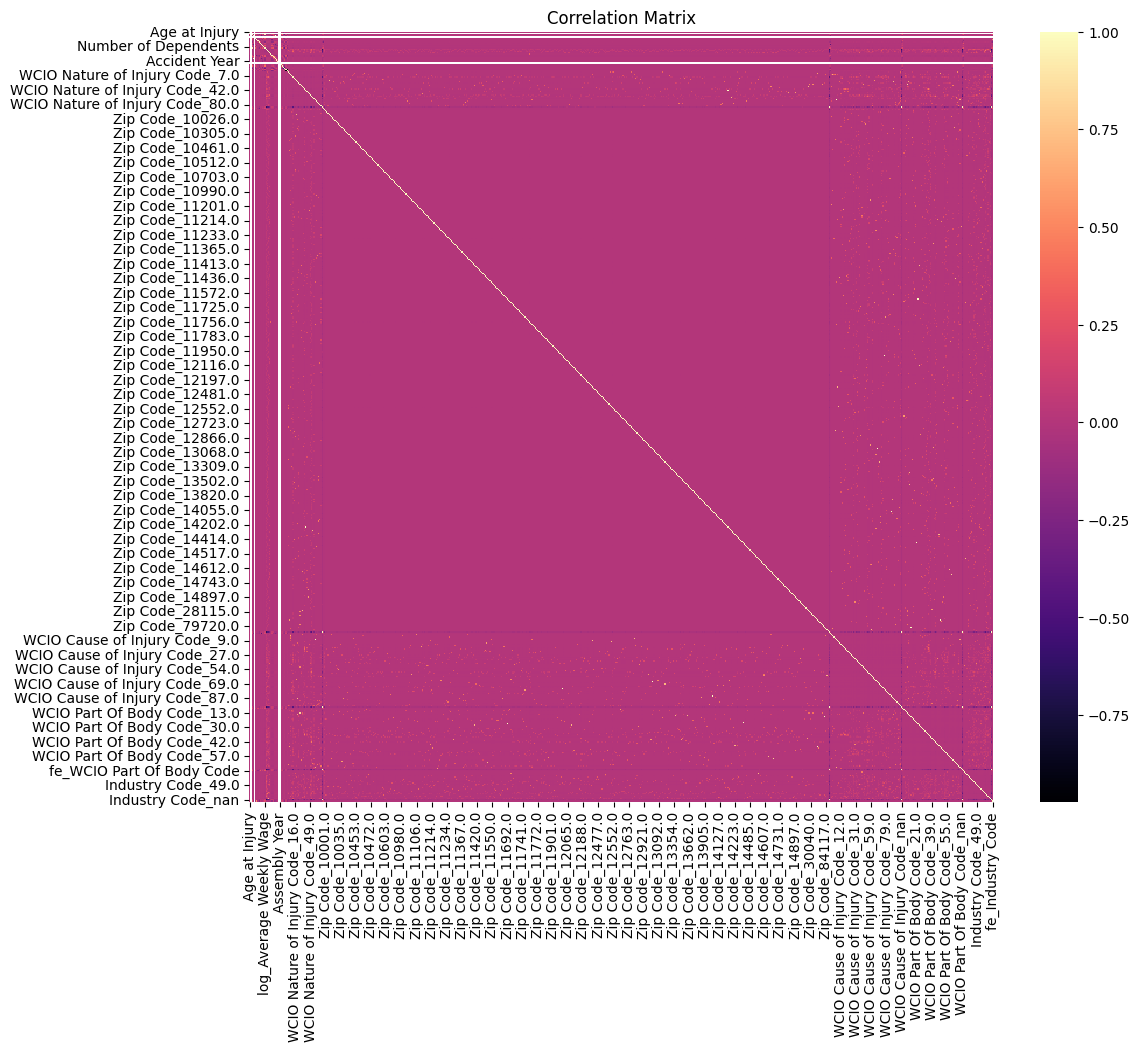

In [25]:

corr_matrix = df_train[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

### entropy based correlation

In [26]:
def entropy(feature):
    return -np.sum([p*np.log2(p) for p in feature.value_counts(normalize=True)])

In [27]:
def entropy_corr(df, n_iter=30, n_frac=0.5):

    entropy_matrix = []
    for col in df.columns:
        s = entropy(df[col])
        delta_entropy = []
        for i in range(n_iter):
            x = df[col].sample(frac=n_frac, random_state=i)
            delta_entropy.append(s - entropy(x) / s)
        entropy_matrix.append(delta_entropy)
    entropy_matrix = pd.DataFrame(entropy_matrix, index=df.columns)
    return entropy_matrix.T.corr()

In [28]:
entropy_corr_matrix = entropy_corr(df_train[num_cols])

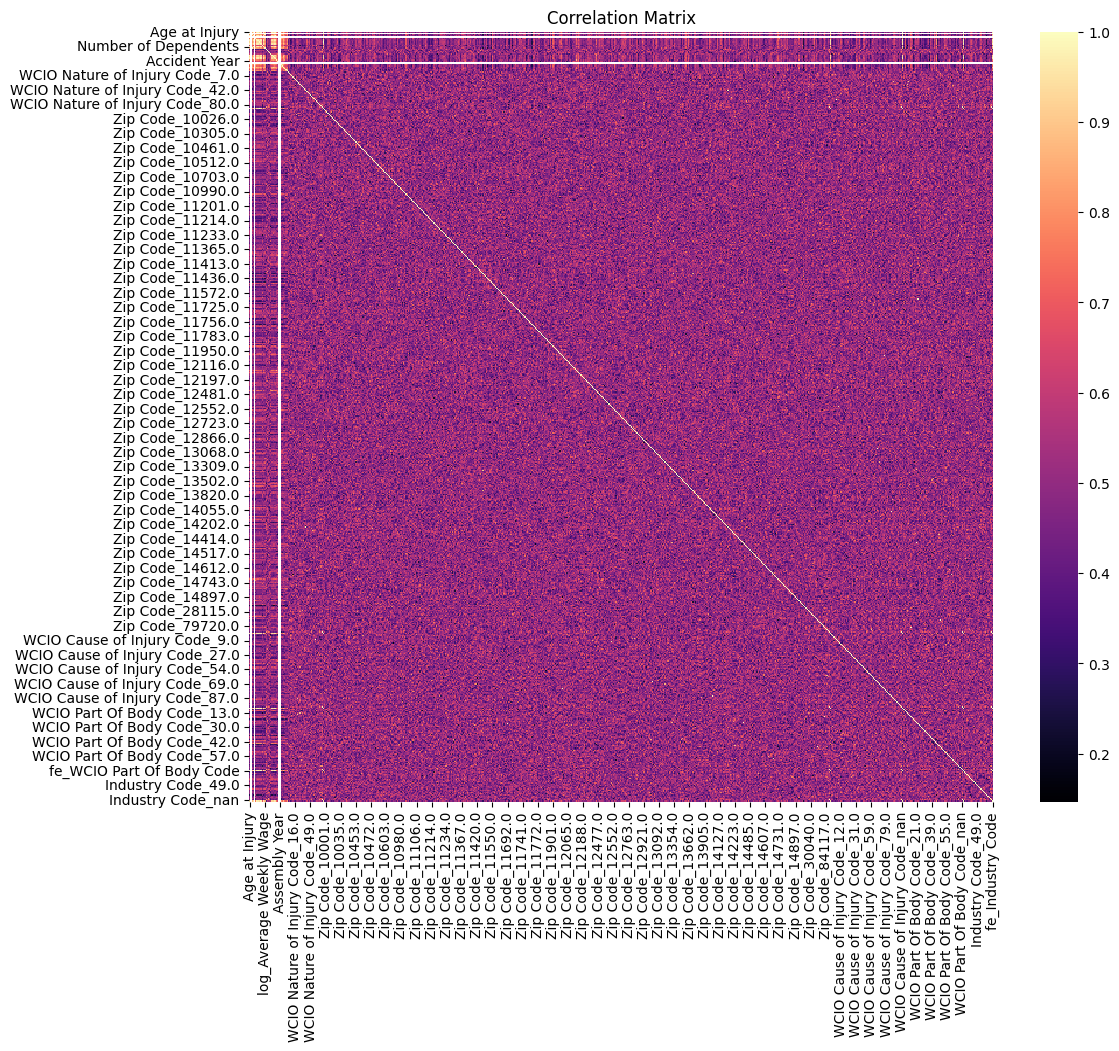

In [29]:
plt.figure(figsize=(12, 10))
sns.heatmap((entropy_corr_matrix + 1)/2, annot=False, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

### recursive function for classification based on mutual correlation

this function classifies the features based on their mutual correlation. Once the most ocorrelated features are found, the function removes it and repeats the process until the correlation.

I'm not a big fan of this methd but let's see

In [30]:
def classify_correlated_feature_maxmin(df, report=False, method='linear', elbow=False) -> pd.DataFrame:
    features = []
    score = []
    df_corr_search = df.copy()

    if (method == 'linear') | (method == 'spearman') | (method == 'l'):
        for i in range(df_corr_search.shape[1]):
            corr_matrix = df_corr_search.corr()
            # set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['max'] = abs(corr_matrix).max(axis=1)
            feature_to_drop = corr_matrix['max'].idxmax()
            score.append(corr_matrix['max'].max())
            features.append(feature_to_drop)
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])
    elif (method == 'entropy') | (method == 'e') | (method == 'max') | (method == 's'):
        print("the interpretation of this one should be done with caution")
        for i in range(df_corr_search.shape[1]):
            corr_matrix = (entropy_corr(df_corr_search) + 1)/2
            # set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['max'] = abs(corr_matrix).max(axis=1)
            feature_to_drop = corr_matrix['max'].idxmax()
            score.append(corr_matrix['max'].max())
            features.append(feature_to_drop)
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])

    else:
        print("method not recognized")
        return

    correlation_feature_scores = pd.DataFrame(
        {'feature': features, 'score': score})
    correlation_feature_scores['d1'] = correlation_feature_scores['score'].diff(
    )
    correlation_feature_scores['d2'] = correlation_feature_scores['d1'].diff()
    elbow_value = correlation_feature_scores['d2'][:-2].idxmax()
    if report:
        plt.figure(figsize=(12, 10))
        plt.plot(correlation_feature_scores['score'], label='score')
        plt.plot(correlation_feature_scores['d1'], label='d1')
        plt.plot(correlation_feature_scores['d2'], label='d2')
        plt.axvline(elbow_value, color='r', linestyle='--', label='elbow')
        plt.legend()
        plt.show()
    if elbow:
        return correlation_feature_scores[['feature', 'score']][:elbow_value], correlation_feature_scores[['feature', 'score']][elbow:]
    return_df = correlation_feature_scores[['feature', 'score']]
    return_df = pd.DataFrame(
        {'feature': features, 'score': score}, index=features)
    return_df.drop(columns=['feature'], inplace=True)
    return return_df

In [31]:
def classify_correlated_features(df, report=False, method='linear', elbow=False) -> pd.DataFrame:
    features = []
    score = []
    df_corr_search = df.copy()

    if (method == 'linear') | (method == 'spearman') | (method == 'l'):
        for i in range(df_corr_search.shape[1]):
            corr_matrix = df_corr_search.corr()
            # set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['avg'] = abs(corr_matrix).mean(axis=1)
            corr_matrix = corr_matrix.sort_values(by='avg', ascending=False)
            feature_to_drop = corr_matrix.index[0]
            features.append(feature_to_drop)
            score.append(corr_matrix['avg'].iloc[0])
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])
    elif (method == 'entropy') | (method == 'e') | (method == 'ent') | (method == 's'):
        print("the interpretation of this one should be done with caution")
        for i in range(df_corr_search.shape[1]):
            corr_matrix = (entropy_corr(df_corr_search) + 1)/2
            # set the diagonal of the dataframe to 0 otherwise the max will always be 1
            corr_matrix = corr_matrix - np.diag(np.diag(corr_matrix))
            corr_matrix['avg'] = abs(corr_matrix).mean(axis=1)
            corr_matrix = corr_matrix.sort_values(by='avg', ascending=False)
            feature_to_drop = corr_matrix.index[0]
            features.append(feature_to_drop)
            score.append(corr_matrix['avg'].iloc[0])
            df_corr_search = df_corr_search.drop(columns=[feature_to_drop])

    else:
        print("method not recognized")
        return

    correlation_feature_scores = pd.DataFrame(
        {'feature': features, 'score': score})
    correlation_feature_scores['d1'] = correlation_feature_scores['score'].diff(
    )
    correlation_feature_scores['d2'] = correlation_feature_scores['d1'].diff()
    elbow = correlation_feature_scores['d2'][:-2].idxmax()
    if report:
        plt.figure(figsize=(12, 10))
        plt.plot(correlation_feature_scores['score'], label='score')
        plt.plot(correlation_feature_scores['d1'], label='d1')
        plt.plot(correlation_feature_scores['d2'], label='d2')
        plt.axvline(elbow, color='r', linestyle='--', label='elbow')
        plt.legend()
        plt.show()
    if elbow:
        return correlation_feature_scores[['feature', 'score']][:elbow], correlation_feature_scores[['feature', 'score']][elbow:]
    return_df = correlation_feature_scores[['feature', 'score']]
    return_df = pd.DataFrame(
        {'feature': features, 'score': score}, index=features)
    return_df.drop(columns=['feature'], inplace=True)
    return return_df

In [32]:
x = classify_correlated_feature_maxmin(df_train[num_cols], report=True)

KeyError: '[nan] not found in axis'

In [ ]:
classify_correlated_feature_maxmin(
    df_train[num_cols], report=True, method='entropy')

## correlation with target 

### entropy based correlation

In [33]:
def two_col_entropy_corr(f1, f2, n_iter=30, n_frac=0.5):
    baseline_s_x1 = entropy(f1)
    baseline_s_x2 = entropy(f2)

    s_x1 = []
    s_x2 = []
    for i in range(n_iter):
        x1 = f1.sample(frac=0.9, random_state=i)
        x2 = f2.sample(frac=0.9, random_state=i)
        s_x1.append(baseline_s_x1 - entropy(x1)/baseline_s_x1)
        s_x2.append(baseline_s_x2 - entropy(x2)/baseline_s_x2)
    return np.corrcoef(s_x1, s_x2)[0, 1]

### Chi-Square for categorical data

In [34]:
from scipy.stats import chi2_contingency

In [ ]:
prep1.get_code_features()

In [40]:
list(df_train.columns)

['Age at Injury',
 'Alternative Dispute Resolution',
 'Attorney/Representative',
 'Average Weekly Wage',
 'Birth Year',
 'Carrier Name',
 'Carrier Type',
 'County of Injury',
 'COVID-19 Indicator',
 'District Name',
 'Gender',
 'IME-4 Count',
 'Industry Code',
 'Medical Fee Region',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code',
 'Agreement Reached',
 'WCB Decision',
 'Number of Dependents',
 'log_Average Weekly Wage',
 'Carrier Type_1A',
 'Carrier Type_2A',
 'Carrier Type_3A',
 'Carrier Type_4A',
 'Carrier Type_UN',
 'fe_Carrier Type',
 'fe_Medical Fee Region',
 'fe_County of Injury',
 'Age',
 'Accident Month',
 'Accident Year',
 'Assembly Month',
 'Assembly Year',
 'First Hearing Month',
 'First Hearing Year',
 'C-3 Month',
 'C-3 Year',
 'C-2 Month',
 'C-2 Year',
 'WCIO Nature of Injury Code_1.0',
 'WCIO Nature of Injury Code_3.0',
 'WCIO Nature of Injury Code_4.0',
 'WCIO Nature of Injury Code_7.0',
 'WCIO Nature of Injury Code_1

In [ ]:
df_train_cat = 

In [ ]:
def chi2_feature_importance(f1, target, significance_level=0.05, log=False):
    """
    Evaluate if a feature is important to predict the target using the Chi-squared test.

    Parameters:
        data (pd.DataFrame): The dataset containing the feature and target.
        feature (str): The name of the feature column.
        target (str): The name of the target column.
        significance_level (float): The threshold for statistical significance (default 0.05).

    Returns:
        dict: A dictionary containing the chi-squared statistic, p-value, and whether the feature is important.
    """
    # Create a contingency table
    contingency_table = pd.crosstab(f1, target)

    # Perform the Chi-squared test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    total_observations = contingency_table.sum().sum()
    rows, cols = contingency_table.shape

    cramers_v = np.sqrt(
        chi2_stat / (total_observations * min(cols - 1, rows - 1)))

    is_important = p_value < significance_level

    if log:
        if cramers_v < 0.3:
            print(f" {is_important} the test is not significant {cramers_v}")
        elif cramers_v < 0.5:
            print(f" {is_important} the test is weakly significant {cramers_v}")
        elif cramers_v < 0.7:
            print(f" {is_important} the test is moderately significant {cramers_v}")
        elif cramers_v < 1:
            print(f" {is_important} the test is highly significant {cramers_v}")
        else:
            print(f"the test has no sense {cramers_v}")

    # Determine if the feature is important
    is_important = p_value < significance_level
    return cramers_v, p_value

### function for classification based on correlation with target

to evalueate if a feature is relevant or not, we can use the correlation with the target trough the chi-square test for categorical data and entropy for numerical data. in this test the p-value is used to determine if the feature is relevant or not but it is not the only parameter to be considered. the cramers_v is also important to determine the strength of the correlation especiallli in the case of underrepresented classes like ours. 

To classify the features based on the correlation with the target we will multiply the coplement of the p-value by the cramers_v. instead of using the cramers_v we will use the sigmoid function of it to give more importance to the features with higher correlation anf havily penalize the features with low correlation.

In [ ]:
# sigmoid function
def sigmoid(x, a=20):
    return 1 / (1 + np.exp(-a * (x - 0.5)))

plt.figure(figsize=(12, 8))
x = np.linspace(0, 1, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.xlabel('x')


In [ ]:
def classify_correlation_w_target(f1, target, significance_level=0.05, log=False, method='chi2', parameter_sigmoid=20):

    if method == 'chi2':
        cramers_v, p_value = chi2_feature_importance(
            f1, target, significance_level, log)
        score = (1 - p_value)*sigmoid(cramers_v, a=parameter_sigmoid)

    elif method == 'entropy' or method == 'ent' or method == 'e' or method == 's':
        score = (two_col_entropy_corr(f1, target) + 1) / 2

    elif method == 'linear' or method == 'spearman' or method == 'l':
        score = np.abs(f1.corr(target))

    elif method == 'all':
        cramers_v, p_value = chi2_feature_importance(
            f1, target, significance_level, log)
        try:
            score1 = (1 - p_value)*sigmoid(cramers_v, a=parameter_sigmoid)
        except Exception as e:
            score1 = np.nan
        try:
            score2 = (two_col_entropy_corr(f1, target) + 1) / 2
        except Exception as e:
            score2 = np.nan
        try:
            score3 = np.abs(f1.corr(target))
        except Exception as e:
            score3 = np.nan
        return score1, score2, score3

    return score

In [ ]:
def calculate_feature_correlation_scores(df, target):
    corr_scores = pd.DataFrame()
    for col in df.columns:
        score1, score2, score3 = classify_correlation_w_target(df[col], target)
        corr_scores[col] = [score1, score2, score3]
    corr_scores = corr_scores.T
    corr_scores.columns = ['chi2', 'entropy', 'linear']

    corr_scores.index.name = 'feature'

    lin_corr_df = classify_correlated_feature_maxmin(
        df_train[num_cols], report=False, method='linear')
    ent_corr_df = classify_correlated_feature_maxmin(
        df_train[num_cols], report=False, method='entropy')

    lin_corr_df = lin_corr_df.columns = ['linear_x']
    ent_corr_df = ent_corr_df.columns = ['entropy_x']

    corr_scores = pd.concat([lin_corr_df, ent_corr_df, corr_scores], axis=1)

    return corr_scores

In [ ]:
# create a dataframe with the correlation scores
corr_scores = pd.DataFrame()
for var in df_train_cat.columns:
    print(var)
    s1, s2, s3 = classify_correlation_w_target(
        df_train[var], y_train, method='all')
    corr_scores[var] = [s1, s2, s3]

corr_scores = corr_scores.T
corr_scores.columns = ['chi2_y', 'entropy_y', 'linear_y']
corr_scores.index.name = 'feature'

lin_corr_df = classify_correlated_feature_maxmin(
    df_train[num_cols], report=False, method='linear')
lin_corr_df.columns = ['linear_x']
lin_corr_df['linear_x'] = (1 - lin_corr_df['linear_x'])
lin_corr_df['linear_x'] = lin_corr_df['linear_x'].abs()
s_corr_df = classify_correlated_feature_maxmin(
    df_train[num_cols], report=False, method='entropy', elbow=False)
s_corr_df.columns = ['entropy_x']
s_corr_df['entropy_x'] = (1 - s_corr_df['entropy_x'])
s_corr_df['entropy_x'] = s_corr_df['entropy_x'].abs()

feature_selection = pd.concat([lin_corr_df, s_corr_df, corr_scores], axis=1)
pd.concat([lin_corr_df, s_corr_df, corr_scores], axis=1)

In [ ]:
feature_selection

In [ ]:
# formula 1 score
points_in_formula1 = [25, 18, 15, 12, 10, 8, 6, 4, 2, 1]

feature_selection['points'] = np.zeros(feature_selection.shape[0])
for col in feature_selection.columns:
    x = feature_selection[col].sort_values(ascending=False, inplace=False)
    for place in range(10):
        feature_selection.loc[x.index[place],
                              'points'] += points_in_formula1[place]

In [ ]:
# first correlation with the target then the correlation between the features

col_y = feature_selection.columns.str.contains('_y')
col_x = feature_selection.columns.str.contains('_x')

# maximum score among the features in col_y

feature_selection['max_y'] = feature_selection[col_y].max(axis=1)
feature_selection['max_x'] = feature_selection[col_x].max(axis=1)


feature_selection

# choiche maker

In [ ]:
# create a class called choose_features
# it gets a dataframe as input and returns the best features

class ChooseFeatures:

    def init(self, method, n_features):
        self.method = method
        self.n_features = n_features
        self.corr_scores = None

    def fit_corr_scores(self,df, target):
        corr_scores = pd.DataFrame()
        for col in df.columns:
            score1, score2, score3 = self.classify_correlation_w_target(df[col], target)
            corr_scores[col] = [score1, score2, score3]
        corr_scores = corr_scores.T
        corr_scores.columns = ['chi2', 'entropy', 'linear']

        corr_scores.index.name = 'feature'

        lin_corr_df = classify_correlated_feature_maxmin(df_train[num_cols], report=False, method='linear')
        ent_corr_df = classify_correlated_feature_maxmin(df_train[num_cols], report=False, method='entropy')

        lin_corr_df = lin_corr_df.columns = ['linear_x']
        ent_corr_df = ent_corr_df.columns = ['entropy_x']

        self.corr_scores = pd.concat([lin_corr_df, ent_corr_df, corr_scores], axis=1)


    def formula1_score(self, df_input):
        df = df_input.copy()
        points_in_formula1 = [25, 18, 15, 12, 10, 8, 6, 4, 2, 1]
        df['points'] = np.zeros(df.shape[0])
        for col in df.columns:
            x = df[col].sort_values(ascending=False, inplace=False)
            for place in range(10):
                df.loc[x.index[place], 'points'] += points_in_formula1[place]
        x = df['points'].sort_values(ascending=False, inplace=False)
        return x.index[:self.n_features]
    
    def y_before_x(self, df):
        col_y = df.columns.str.contains('_y')
        col_x = df.columns.str.contains('_x')
        df['max_y'] = df[col_y].max(axis=1)
        df['max_x'] = df[col_x].max(axis=1)
        df.sort_values(by=['max_y','max_x'], ascending=False, inplace=True)
        #if max_y is the same, then remove the one with the lower max_x
        df = df.drop_duplicates(subset='max_y', keep='first')
        return df.index[:self.n_features]
    
    def classify_correlation_w_target(f1, target, significance_level=0.05, log=False, method='chi2', parameter_sigmoid=20):

    if method == 'chi2':
        cramers_v, p_value = self.chi2_feature_importance(
            f1, target, significance_level, log)
        score = (1 - p_value)*self.sigmoid(cramers_v, a=parameter_sigmoid)

    elif method == 'entropy' or method == 'ent' or method == 'e' or method == 's':
        score = (self.two_col_entropy_corr(f1, target) + 1) / 2

    elif method == 'linear' or method == 'spearman' or method == 'l':
        score = np.abs(f1.corr(target))

    elif method == 'all':
        cramers_v, p_value = self.chi2_feature_importance(
            f1, target, significance_level, log)
        try:
            score1 = (1 - p_value)*self.sigmoid(cramers_v, a=parameter_sigmoid)
        except Exception as e:
            score1 = np.nan
        try:
            score2 = (self.two_col_entropy_corr(f1, target) + 1) / 2
        except Exception as e:
            score2 = np.nan
        try:
            score3 = np.abs(f1.corr(target))
        except Exception as e:
            score3 = np.nan
        return score1, score2, score3

    return score

    def sigmoid(self,x, a=20):
        return 1 / (1 + np.exp(-a * (x - 0.5)))
    
    def entropy(self,feature):
        return -np.sum([p*np.log2(p) for p in feature.value_counts(normalize=True)])
    
    def two_col_entropy_corr(self,f1, f2, n_iter=30, n_frac=0.5):
        baseline_s_x1 = self.entropy(f1)
        baseline_s_x2 = self.entropy(f2)

        s_x1 = []
        s_x2 = []
        for i in range(n_iter):
            x1 = f1.sample(frac=0.9, random_state=i)
            x2 = f2.sample(frac=0.9, random_state=i)
            s_x1.append(baseline_s_x1 - self.entropy(x1)/baseline_s_x1)
            s_x2.append(baseline_s_x2 - self.entropy(x2)/baseline_s_x2)
        return np.corrcoef(s_x1, s_x2)[0, 1]
    
    def chi2_feature_importance(self,f1, target, significance_level=0.05, log=False):
        """
        Evaluate if a feature is important to predict the target using the Chi-squared test.

        Parameters:
            data (pd.DataFrame): The dataset containing the feature and target.
            feature (str): The name of the feature column.
            target (str): The name of the target column.
            significance_level (float): The threshold for statistical significance (default 0.05).

        Returns:
            dict: A dictionary containing the chi-squared statistic, p-value, and whether the feature is important.
        """
        # Create a contingency table
        contingency_table = pd.crosstab(f1, target)

        # Perform the Chi-squared test
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

        total_observations = contingency_table.sum().sum()
        rows, cols = contingency_table.shape

        cramers_v = np.sqrt(
            chi2_stat / (total_observations * min(cols - 1, rows - 1)))

        is_important = p_value < significance_level

        if log:
            if cramers_v < 0.3:
                print(f" {is_important} the test is not significant {cramers_v}")
            elif cramers_v < 0.5:
                print(f" {is_important} the test is weakly significant {cramers_v}")
            elif cramers_v < 0.7:
                print(f" {is_important} the test is moderately significant {cramers_v}")
            elif cramers_v < 1:
                print(f" {is_important} the test is highly significant {cramers_v}")
            else:
                print(f"the test has no sense {cramers_v}")

        # Determine if the feature is important
        is_important = p_value < significance_level
        return cramers_v, p_value
            

## random forest feature importance

In [ ]:
# classify the features fro most useful to least useful
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(df_train[num_cols], y_train)
y_pred = clf.predict(df_valid[num_cols])
print('Accuracy: ', accuracy_score(y_valid, y_pred))

# get the feature importance
feature_importances = clf.feature_importances_
feature_importances = pd.Series(
    feature_importances, index=df_train[num_cols].columns)
feature_importances = feature_importances.sort_values(ascending=False)
feature_importances.columns = ['fi_RandomForestClassifier']
plt.figure(figsize=(12, 10))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

In [ ]:
feature_importances*10

In [ ]:
# create a dataframe with the correlation scores
corr_scores = pd.DataFrame()
for var in df_dummies:
    print(var)
    s1, s2, s3 = classify_correlation_w_target(
        df_train[var], y_train, method='all')
    corr_scores[var] = [s1, s2, s3]

corr_scores = corr_scores.T
corr_scores.columns = ['chi2_y', 'entropy_y', 'linear_y']
# name teh index column
corr_scores.index.name = 'feature'
lin_corr_df = classify_correlated_feature_maxmin(
    df_train[num_cols], report=False, method='linear')
lin_corr_df.columns = ['linear_x']
s_corr_df = classify_correlated_feature_maxmin(
    df_train[num_cols], report=False, method='entropy', elbow=False)
s_corr_df.columns = ['entropy_x']


feature_selection = pd.concat([lin_corr_df, s_corr_df, corr_scores], axis=1)

In [ ]:
feature_importances = pd.Series(
    feature_importances, index=df_train[num_cols].columns)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(12, 10))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

## RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
num_cols
rfe = RFE(estimator=model, n_features_to_select=4)
rfe.fit(df_train[num_cols], y_train)

In [ ]:
rfe_cols = df_train[num_cols].columns[rfe.support_]

In [ ]:
df_train[num_cols].columns[rfe.support_]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model.fit(df_train[rfe_cols], y_train)
y_pred = model.predict(df_valid[rfe_cols])
accuracy_score(y_valid, y_pred)


print(classification_report(y_valid, y_pred))

## columns chosen by our methods 

# Representation problem

## add noise to the data

In [ ]:
def generate_synthetic_data_from_existing(existing_data, noise_level=0.1, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    # Add Gaussian noise to each feature in the existing data
    synthetic_data = existing_data.copy()
    for column in synthetic_data.columns:
        noise = np.random.normal(
            0, noise_level, size=synthetic_data[column].shape)
        synthetic_data[column] += noise

    return synthetic_data


# Example usage
# Assuming `existing_data` is a DataFrame with your existing data
existing_data = pd.DataFrame({
    'f1': np.random.rand(100),
    'f2': np.random.rand(100),
    'target': np.random.rand(100)
})

synthetic_data = generate_synthetic_data_from_existing(
    existing_data, noise_level=0.1, random_state=42)
print(synthetic_data.head())

In [ ]:
# generate synthetic

In [ ]:
def representation_treshold(len_y, unique_y):
    reurn(len_y/unique_y)-(m.sqrt(len_y/8 * 100)/100)

# try smote

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE


def generate_synthetic_data_using_smote(existing_data, target_column, sampling_strategy='auto', random_state=None):
    # Separate features and target
    X = existing_data.drop(columns=[target_column])
    y = existing_data[target_column]

    # Apply SMOTE to generate synthetic data
    smote = SMOTE(sampling_strategy=sampling_strategy,
                  random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled features and target into a DataFrame
    resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
    resampled_data[target_column] = y_resampled

    return resampled_data


# Example usage
# Assuming `existing_data` is a DataFrame with your existing data
existing_data = pd.DataFrame({
    'f1': np.random.rand(100),
    'f2': np.random.rand(100),
    # Imbalanced target
    'target': np.random.choice([0, 1], size=100, p=[0.9, 0.1])
})

synthetic_data = generate_synthetic_data_using_smote(
    existing_data, target_column='target', random_state=42)
print(synthetic_data.head())